In [28]:
# Importación de librerías para manipulación de datos
import pandas as pd

# Importación de librerías para modelado y evaluación de machine learning
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Importación de librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone -b juan1 https://github.com/Juanchumu/Aprender2016-2024.git

fatal: destination path 'Aprender2016-2024' already exists and is not an empty directory.


This command will clone the repository into your Colab environment. You can then navigate into the cloned directory to access its contents.

In [3]:

# Define the path to the CSV file within the cloned repository
csv_file_path = '/content/Aprender2016-2024/data/processed/final.csv'

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded '{csv_file_path}' into a DataFrame.")
    # Display the first 5 rows of the DataFrame
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the repository was cloned correctly and the file exists at this path.")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")

Successfully loaded '/content/Aprender2016-2024/data/processed/final.csv' into a DataFrame.


,Nivel_Ed_Padre_Primaria_completo,ap01_Febrero,Nivel_Ed_Madre_Primaria_completo,ap02_Multimarca,lat,ap04_Venezuela,ap03_Masculino,ap10_Blanco,ap02_2007,ap04_Bolivia,...,ap06_No,sobreedad_2_años_de_sobreedad_19_años_al_30_de_junio,ap04_Brasil,ap26_Blanco,ap10_Multimarca,sobreedad_1_año_de_sobreedad_18_años_al_30_de_junio,ap01_Noviembre,ap04_Uruguay,Nivel_Ed_Padre_Blanco,ap26_No_disponible
0,86.441102,127.471704,76.851686,4.393591,-34.609558,18.669938,790.441497,0.0,378.537764,50.884287,...,1396.619734,165.881158,5.037586,0.0,0.0,258.552623,133.325662,0.000000,0.0,0.0
1,65.906574,108.551388,39.738048,1.917169,-34.609558,4.612721,666.485955,0.0,564.463470,4.951485,...,1344.433648,46.880071,6.819942,0.0,0.0,185.802144,130.509462,3.195281,0.0,0.0
2,59.224430,85.707571,53.781799,0.000000,-34.627458,0.000000,455.539524,0.0,248.722707,74.808208,...,859.723136,108.666433,2.363073,0.0,0.0,202.432914,63.464868,0.000000,0.0,0.0
3,60.766337,103.273864,19.220123,0.000000,-34.627458,2.450926,523.505782,0.0,516.598623,8.478263,...,1164.834830,11.670888,0.000000,0.0,0.0,119.675230,85.229706,4.019519,0.0,0.0
4,56.497751,40.722596,63.155143,0.000000,-34.603006,1.468707,265.870509,0.0,196.205322,19.981569,...,605.586826,72.699964,0.000000,0.0,0.0,113.704378,44.856576,3.758785,0.0,0.0


In [4]:

cols_target = [
    'ldesemp_Por_debajo_del_nivel_básico',
    'ldesemp_Satisfactorio',
    'ldesemp_Básico',
    'ldesemp_Avanzado','mdesemp_Por_debajo_del_nivel_básico',
    'mdesemp_Satisfactorio',
    'mdesemp_Básico',
    'mdesemp_Avanzado'
]

In [5]:
cols_matematica = [
    'mdesemp_Por_debajo_del_nivel_básico',
    'mdesemp_Satisfactorio',
    'mdesemp_Básico',
    'mdesemp_Avanzado'
]

df['matematica_suma'] = df[cols_matematica[0]] + df[cols_matematica[1]] + df[cols_matematica[2]] + df[cols_matematica[3]]
df['m_bueno'] =  df[cols_matematica[1]] + df[cols_matematica[2]] + df[cols_matematica[3]]

df['m_rendimiento'] = (df[cols_matematica[0]] > df['m_bueno']).astype(int)

for col in cols_matematica:
    df[col] = df[col] / df['matematica_suma']

cols_lengua = [
    'ldesemp_Por_debajo_del_nivel_básico',
    'ldesemp_Satisfactorio',
    'ldesemp_Básico',
    'ldesemp_Avanzado'
]

df['lengua_suma'] = df[cols_lengua[0]] + df[cols_lengua[1]] + df[cols_lengua[2]] + df[cols_lengua[3]]

df['l_bueno'] =  df[cols_lengua[1]] + df[cols_lengua[2]] + df[cols_lengua[3]]

df['l_rendimiento'] = (df[cols_lengua[0]] > df['l_bueno']).astype(int)


for col in cols_lengua:
    df[col] = df[col] / df['lengua_suma']

In [6]:
df['l_rendimiento']

,l_rendimiento
0,0
1,0
2,0
3,0
4,0
...,...
3608,0
3609,0
3610,0
3611,0


In [7]:
df[cols_lengua].head()

,ldesemp_Por_debajo_del_nivel_básico,ldesemp_Satisfactorio,ldesemp_Básico,ldesemp_Avanzado
0,0.201925,0.375007,0.156865,0.266204
1,0.073606,0.425318,0.100621,0.400455
2,0.129788,0.478197,0.195105,0.196910
3,0.072787,0.476433,0.130874,0.319907
4,0.151069,0.483881,0.192135,0.172915


se necesita tener una variable que sea recuento, asi, el modelo entiende que varias columnas son proporciones a una columna de recuento

Pero las sumas hechas sobre las columnas target no sirven

In [8]:
df[['lengua_suma','matematica_suma']]

,lengua_suma,matematica_suma
0,1633.091494,1603.850475
1,1381.959203,1381.959203
2,896.002691,895.212910
3,1181.759356,1181.364416
4,637.074149,635.955367
...,...,...
3608,1127.155566,1127.155566
3609,432.528166,432.528166
3610,95.677465,95.677465
3611,1004.207901,1004.207901


por ello, se emplea el recuento con la primer pregunta

In [9]:
df['recuento'] = df['ap01_Abril'] + df['ap01_Agosto'] + df['ap01_Blanco'] + df['ap01_Diciembre'] + df['ap01_Enero'] + df['ap01_Febrero'] + df['ap01_Julio'] + df['ap01_Junio'] + df['ap01_Marzo'] + df['ap01_Mayo'] + df['ap01_Multimarca'] + df['ap01_No_disponible'] + df['ap01_Noviembre'] + df['ap01_Octubre'] + df['ap01_Septiembre']

Arrancamos con el modelado para matematica

In [35]:


# Define the features (X) and the target (y)
columnas_a_eliminar = ['m_rendimiento','l_rendimiento','matematica_suma', 'lengua_suma', 'm_bueno','l_bueno','sector_binario'] + cols_target
X = df.drop(columns=columnas_a_eliminar)
y = df['m_rendimiento']
z = df['l_rendimiento']
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2890, 93)
X_test shape: (723, 93)
y_train shape: (2890,)
y_test shape: (723,)


# randomForest


Accuracy of Random Forest Classifier: 0.8008

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       306
           1       0.78      0.92      0.84       417

    accuracy                           0.80       723
   macro avg       0.81      0.78      0.79       723
weighted avg       0.81      0.80      0.80       723



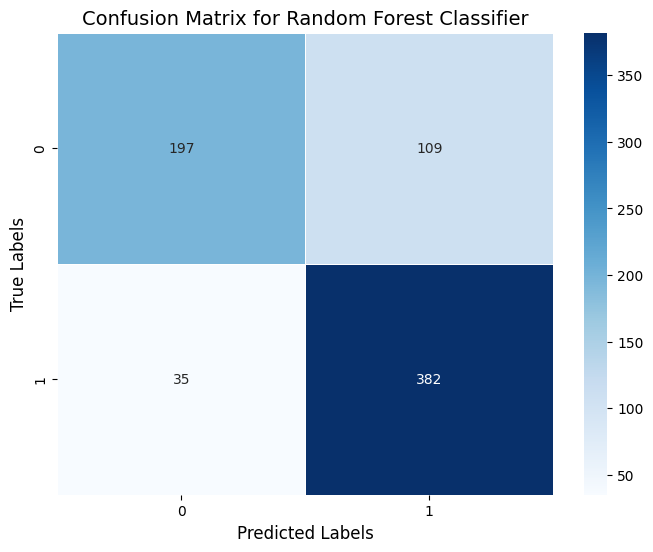

Top 20 Most Important Features for Random Forest:


,Feature,Importance
28,ap19_No_hay_libros_en_formato_papel,0.077997
69,Nivel_Ed_Padre_Terciario_universitario_posgrad...,0.057513
16,ap19_Más_de_100_libros,0.056188
17,ap19_De_51_a_100_libros,0.045530
4,lat,0.044928
36,Nivel_Ed_Madre_Terciario_universitario_posgrad...,0.040240
2,Nivel_Ed_Madre_Primaria_completo,0.034185
63,ap06_Sí,0.025596
40,ap02_2004,0.024918
59,Nivel_Ed_Padre_Terciario_universitario_posgrad...,0.022010


/tmp/ipython-input-1348395205.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')


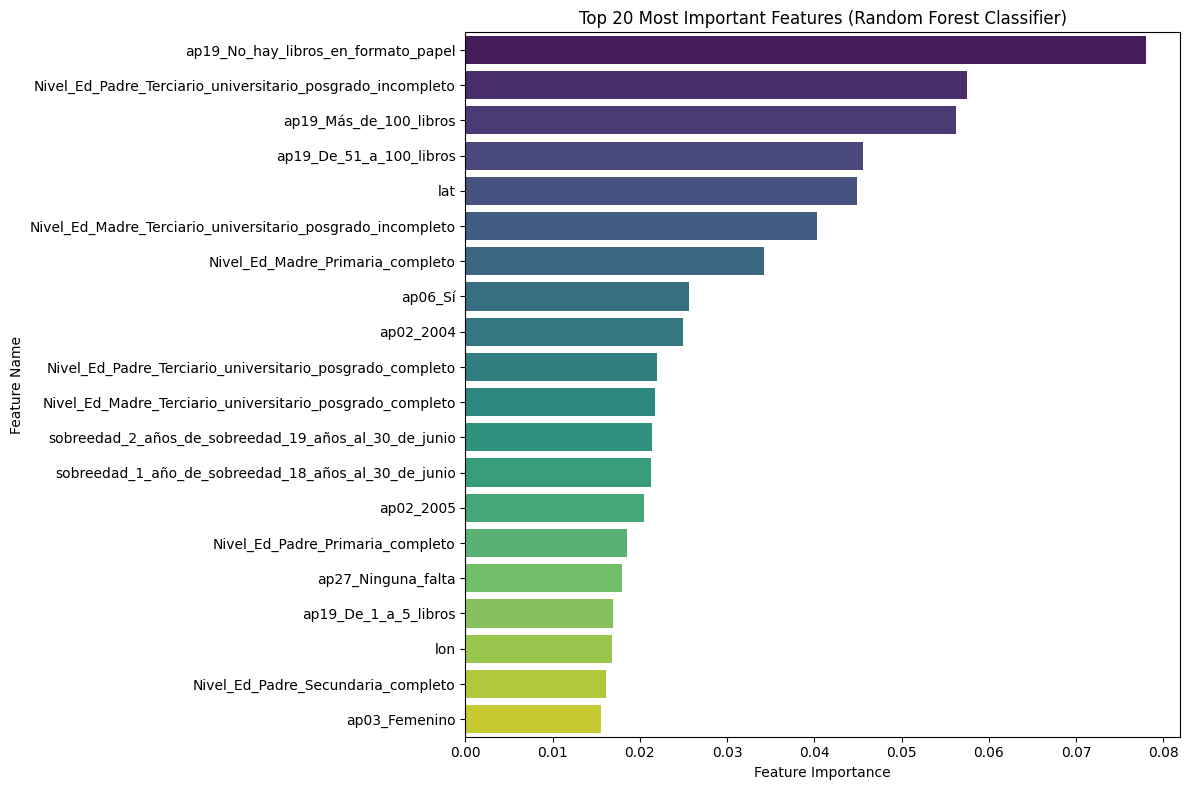

In [36]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune n_estimators and other parameters

# Train the model
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_rf = pd.DataFrame(cm_rf, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_rf,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_rf.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for Random Forest Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()



# Get feature importances from the trained Random Forest classifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the features by importance in descending order
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for Random Forest:")
display(features_df_rf.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (Random Forest Classifier)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# AdaBoostClassifier

Accuracy of AdaBoost Classifier: 0.8008

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       306
           1       0.79      0.90      0.84       417

    accuracy                           0.80       723
   macro avg       0.81      0.78      0.79       723
weighted avg       0.80      0.80      0.80       723



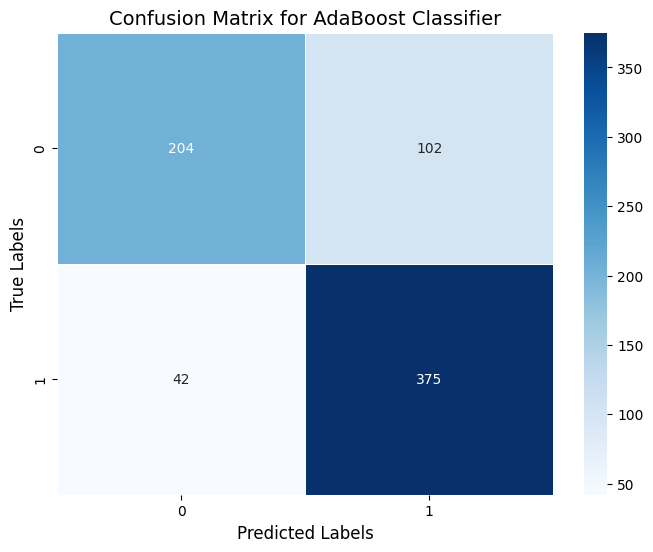

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the base estimator (Decision Tree Classifier is common for AdaBoost)
# Using a shallow tree to prevent overfitting and to let AdaBoost combine weak learners
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost Classifier
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Weights applied to each classifier at each boosting iteration.
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ada:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, zero_division=0))

# Calculate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_ada = pd.DataFrame(cm_ada, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_ada,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_ada.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for AdaBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# XGBoost

Accuracy of XGBoost Classifier: 0.8105

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       306
           1       0.80      0.89      0.84       417

    accuracy                           0.81       723
   macro avg       0.81      0.80      0.80       723
weighted avg       0.81      0.81      0.81       723



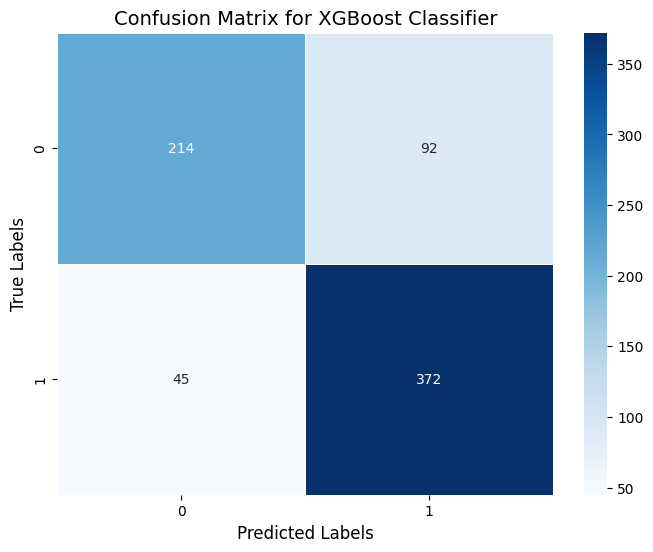

Top 20 Most Important Features for XGBoost:


,Feature,Importance
69,Nivel_Ed_Padre_Terciario_universitario_posgrad...,0.075040
28,ap19_No_hay_libros_en_formato_papel,0.074608
16,ap19_Más_de_100_libros,0.048303
4,lat,0.030751
17,ap19_De_51_a_100_libros,0.024445
40,ap02_2004,0.023302
46,ap02_Blanco,0.023289
87,sobreedad_1_año_de_sobreedad_18_años_al_30_de_...,0.023011
47,Nivel_Ed_Padre_Secundaria_completo,0.019554
82,ap06_No,0.017464


/tmp/ipython-input-200625903.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


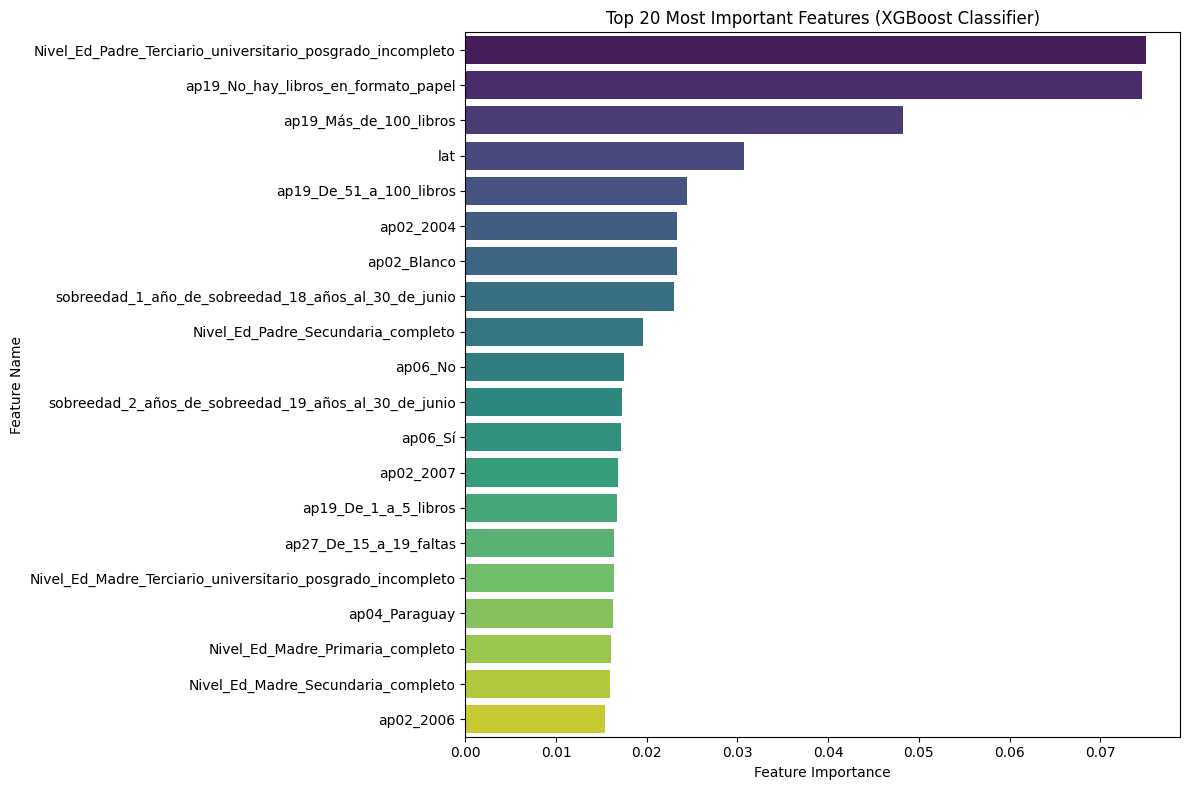

In [38]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the XGBoost Classifier
# Use 'multi:softmax' for multi-class classification
# 'objective' should match the type of target variable (here, integer labels)
# n_estimators: Number of boosting rounds (trees)
# random_state for reproducibility
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax', # For multi-class classification
    num_class=len(y_train.unique()), # Number of unique classes in the target
    n_estimators=100, # Number of boosting rounds
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    eval_metric='mlogloss', # Evaluation metric for multi-class classification
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_xgb = pd.DataFrame(cm_xgb, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_xgb,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_xgb.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for XGBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for XGBoost:")
display(features_df.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (XGBoost Classifier)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# Lengua

# Random Foresta Lengua

Accuracy of Random Forest Classifier: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       703
           1       0.00      0.00      0.00        20

    accuracy                           0.97       723
   macro avg       0.49      0.50      0.49       723
weighted avg       0.95      0.97      0.96       723



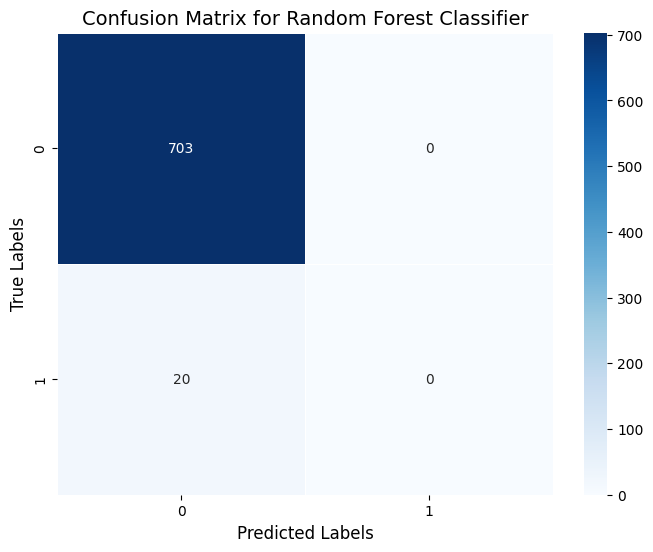

Top 20 Most Important Features for Random Forest:


,Feature,Importance
28,ap19_No_hay_libros_en_formato_papel,0.033757
17,ap19_De_51_a_100_libros,0.029535
27,ap02_2006,0.027876
82,ap06_No,0.027708
2,Nivel_Ed_Madre_Primaria_completo,0.027260
60,ap03_Femenino,0.027134
47,Nivel_Ed_Padre_Secundaria_completo,0.025683
71,ap04_Argentina,0.025338
92,recuento,0.024761
83,sobreedad_2_años_de_sobreedad_19_años_al_30_de...,0.024469


/tmp/ipython-input-3426880256.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')


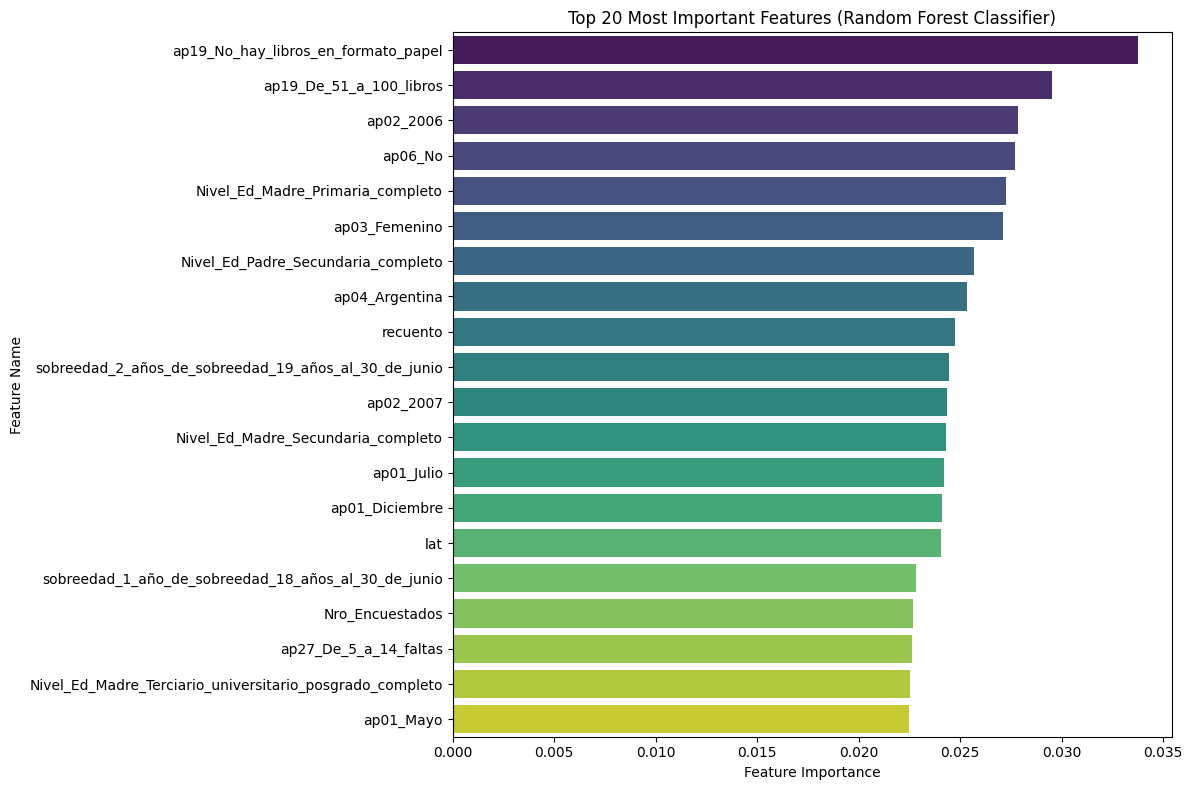

In [39]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune n_estimators and other parameters

# Train the model
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_rf = pd.DataFrame(cm_rf, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_rf,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_rf.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for Random Forest Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()



# Get feature importances from the trained Random Forest classifier
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the features by importance in descending order
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for Random Forest:")
display(features_df_rf.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (Random Forest Classifier)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# ADA lengua

Accuracy of AdaBoost Classifier: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       703
           1       0.00      0.00      0.00        20

    accuracy                           0.97       723
   macro avg       0.49      0.50      0.49       723
weighted avg       0.95      0.97      0.96       723



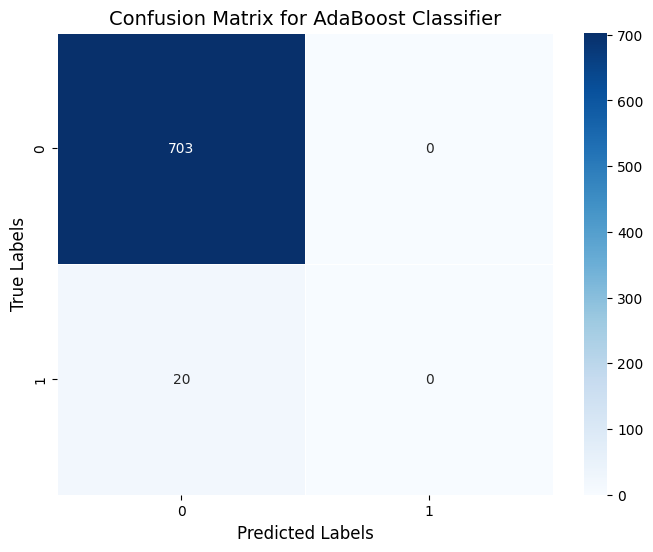

In [40]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)
# Initialize the base estimator (Decision Tree Classifier is common for AdaBoost)
# Using a shallow tree to prevent overfitting and to let AdaBoost combine weak learners
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost Classifier
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Weights applied to each classifier at each boosting iteration.
ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ada:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada, zero_division=0))

# Calculate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_ada = pd.DataFrame(cm_ada, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_ada,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_ada.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for AdaBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

#XGBoost lengua

Accuracy of XGBoost Classifier: 0.9723

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       703
           1       0.00      0.00      0.00        20

    accuracy                           0.97       723
   macro avg       0.49      0.50      0.49       723
weighted avg       0.95      0.97      0.96       723



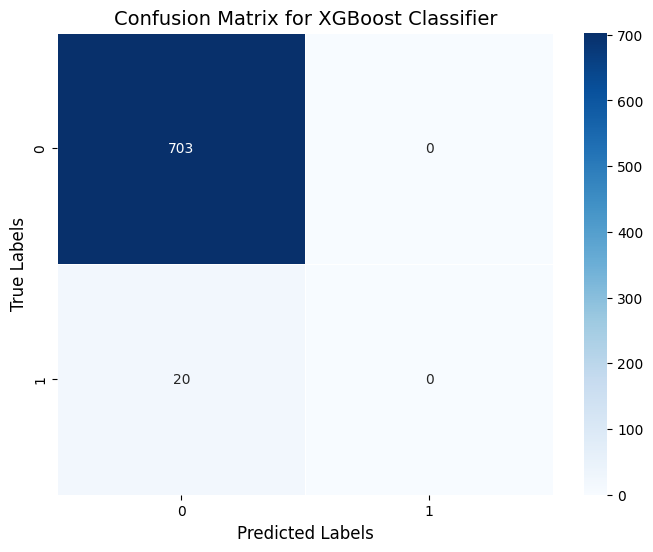

Top 20 Most Important Features for XGBoost:


,Feature,Importance
71,ap04_Argentina,0.056205
17,ap19_De_51_a_100_libros,0.049413
69,Nivel_Ed_Padre_Terciario_universitario_posgrad...,0.035611
40,ap02_2004,0.030636
41,ap01_Marzo,0.029292
20,ap04_En_un_país_de_Asia,0.027331
78,ap01_Abril,0.026362
61,ap01_Blanco,0.026071
37,Nivel_Ed_Madre_Terciario_universitario_posgrad...,0.024844
51,ap27_De_5_a_14_faltas,0.023869


/tmp/ipython-input-3013154714.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


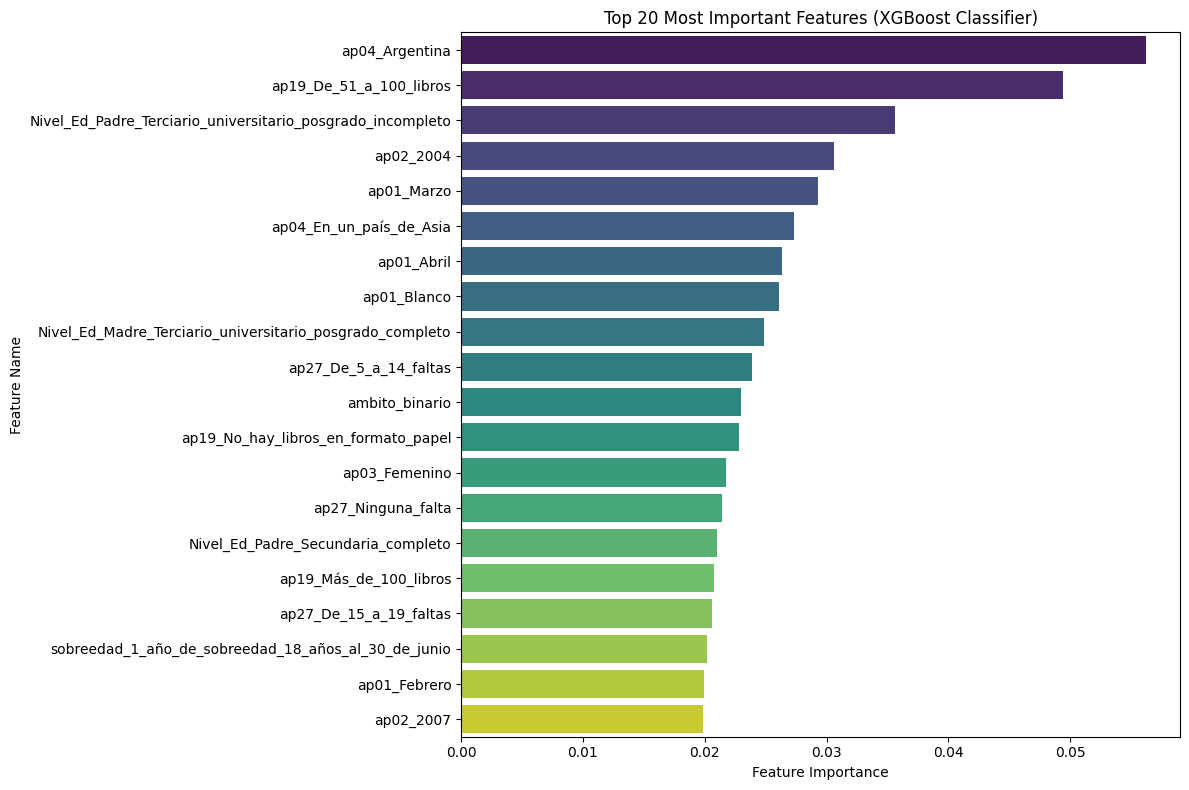

In [41]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=42)
# Initialize the XGBoost Classifier
# Use 'multi:softmax' for multi-class classification
# 'objective' should match the type of target variable (here, integer labels)
# n_estimators: Number of boosting rounds (trees)
# random_state for reproducibility
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax', # For multi-class classification
    num_class=len(y_train.unique()), # Number of unique classes in the target
    n_estimators=100, # Number of boosting rounds
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    eval_metric='mlogloss', # Evaluation metric for multi-class classification
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a DataFrame for the confusion matrix for better visualization
df_cm_xgb = pd.DataFrame(cm_xgb, index=sorted(y_test.unique()), columns=sorted(y_test.unique()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm_xgb,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            linewidths=.5,
            vmax=df_cm_xgb.values.max(),
            annot_kws={"size": 10})

plt.title('Confusion Matrix for XGBoost Classifier', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()


# Get feature importances from the trained XGBoost classifier
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features for XGBoost:")
display(features_df.head(20))

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features (XGBoost Classifier)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

graficos de ambito rural y urbano
graficos de sector privado y publico